# DECISION TREE ASSIGNMENT | Obesity Classification Dataset

## Introduction of the Dataset

The Obesity Classification Dataset is a compact dataset comprising 108 entries, specifically designed to assist in the classification of obesity based on various individual attributes. This dataset includes seven columns, each representing different characteristics and measurements of the individuals:

- ID: A unique identifier for each individual (integer).
- Age: The age of the individual (integer).
- Gender: The gender of the individual (object, categorical).
- Height: The height of the individual in centimeters (integer).
- Weight: The weight of the individual in kilograms (integer).
- BMI: The Body Mass Index, calculated as weight in kilograms divided by height in meters squared (float).
- Label: The classification label indicating the obesity category of the individual (object, categorical).

## Import Libraries

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Dataset

In [148]:
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\Obesity Classification.csv")
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese


## Basic Information of Dataset

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    int64  
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 6.0+ KB


## Summary of the dataset

In [150]:
df.describe()

,ID,Age,Gender,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,0.518519,166.574074,59.490741,20.549074
std,31.917939,24.720620,0.501986,27.873615,28.856233,7.583818
min,1.000000,11.000000,0.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,0.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,1.000000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,1.000000,190.000000,85.000000,26.100000
max,110.000000,112.000000,1.000000,210.000000,120.000000,37.200000


## Checking Missing values in DataFrame

In [151]:
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

## Handling Categorical Variables

In [152]:
df['Label'] = df['Label'].astype('category').cat.codes
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1


## Visualizations

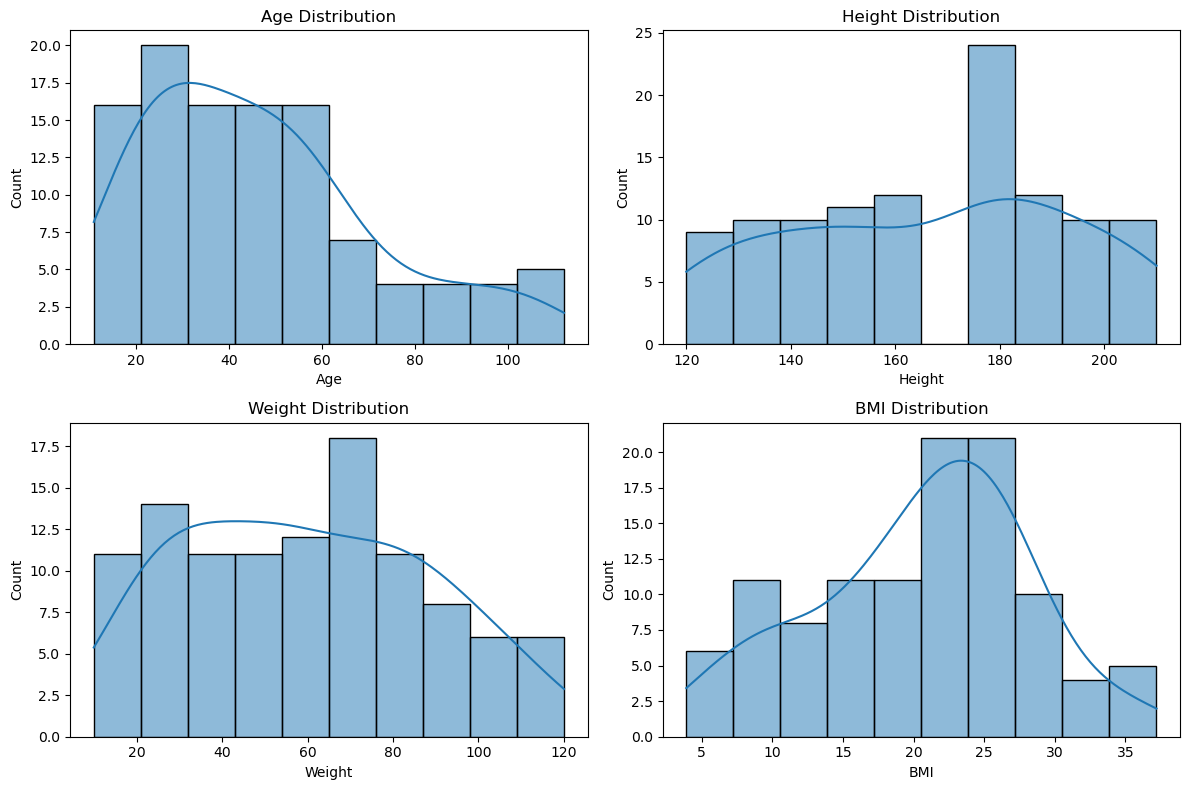

In [153]:
# Plot histograms for Age, Height, Weight, and BMI
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Height'], kde=True, bins=10)
plt.title('Height Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Weight'], kde=True, bins=10)
plt.title('Weight Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['BMI'], kde=True, bins=10)
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

- Age Distribution: The age distribution appears relatively uniform, with no significant skewness.
- Height and Weight Distributions: These show a more normal distribution, indicating a standard range of values for the dataset.
- BMI Distribution: The BMI distribution highlights potential outliers that may need further investigation.

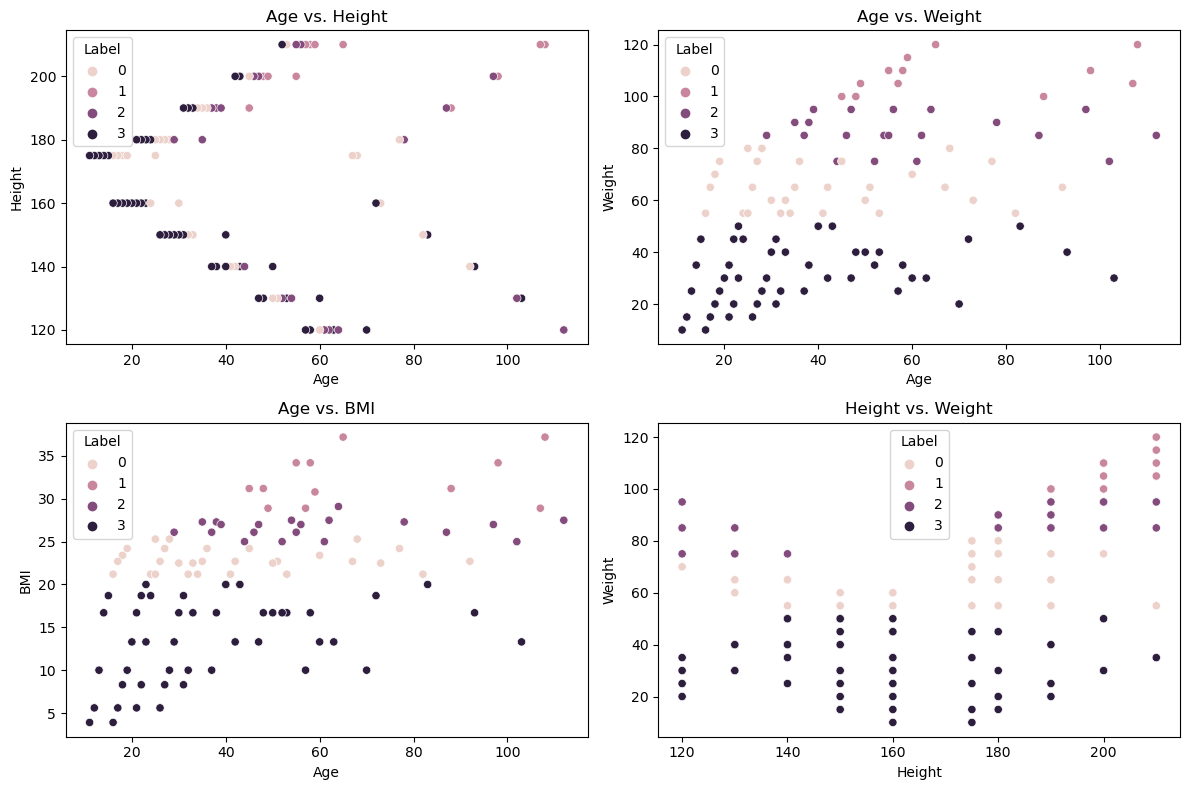

In [154]:
# Scatter plots to visualize relationships
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='Height', hue='Label', data=df)
plt.title('Age vs. Height')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Age', y='Weight', hue='Label', data=df)
plt.title('Age vs. Weight')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='BMI', hue='Label', data=df)
plt.title('Age vs. BMI')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Height', y='Weight', hue='Label', data=df)
plt.title('Height vs. Weight')

plt.tight_layout()
plt.show()


- Scatter Plots: Visualizations show no clear linear relationships between the features, but they indicate how different obesity categories are spread across the feature space.

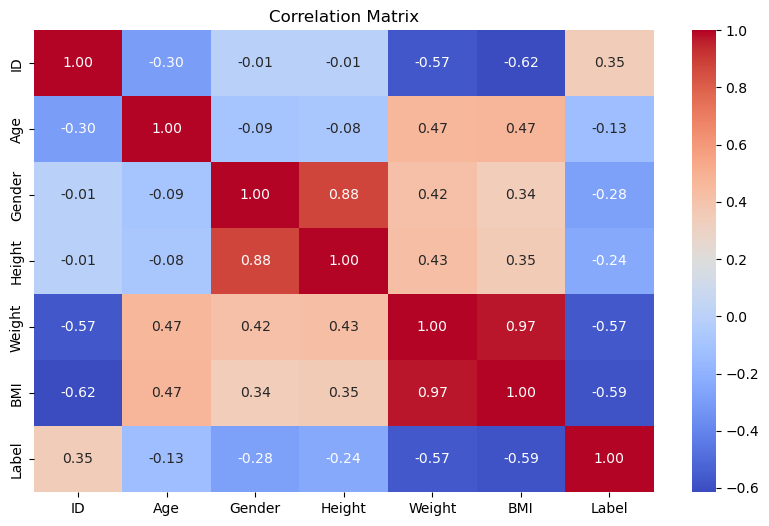

In [155]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Correlation Matrix: This helps identify any strong correlations between features, guiding feature selection and engineering.

## Splitting the Dataset

In [156]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df.drop(columns=['ID', 'Label'])
y = df['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (86, 5) (86,)
Testing set shape: (22, 5) (22,)


- Split the dataset into training (80%) and testing (20%) sets for model training and evaluation.

## Implement Decision Tree Algorithm

In [157]:
from sklearn.tree import DecisionTreeClassifier

# Initialize DecisionTreeClassifier with chosen hyperparameters
tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='gini', random_state=42)

- Maximum Depth: Determines the maximum depth of the tree. We'll choose a depth that prevents overfitting but captures important patterns.
- Minimum Samples per Leaf: Sets minimum number of samples required to be at leaf node. This parameter helps control the complexity of tree. 
- Splitting Criteria: Criteria for splitting nodes, typically 'gini' for Gini impurity or 'entropy' for information gain.

## Train the Decision Tree model on the training data

In [158]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

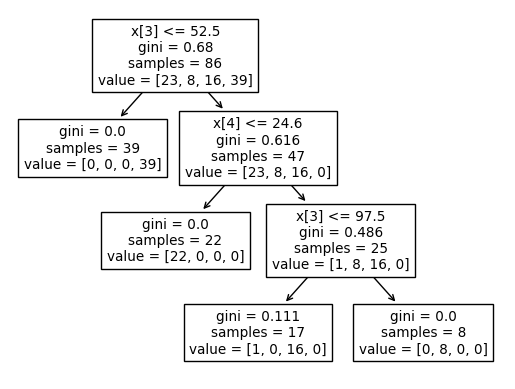

In [159]:
from sklearn import tree

tree.plot_tree(tree_clf);

In [160]:
y_train.value_counts()

Label
3    39
0    23
2    16
1     8
Name: count, dtype: int64

## Predicting on test data set

In [161]:
y_pred = tree_clf.predict(X_test) 
pd.Series(y_pred).value_counts()

3    8
2    6
0    4
1    4
Name: count, dtype: int64

In [162]:
y_test

77     0
10     0
4      1
83     3
62     0
67     2
30     0
45     2
95     3
11     3
81     3
79     3
0      0
80     3
18     1
69     3
56     1
76     2
106    3
42     2
12     0
36     1
Name: Label, dtype: int8

In [163]:
y_pred 

array([0, 0, 1, 3, 0, 2, 0, 2, 3, 3, 3, 3, 2, 3, 1, 3, 1, 2, 3, 2, 2, 1],
      dtype=int8)

## 2 way table to understand the correct and wrong predictions

In [164]:
pd.crosstab(y_test, y_pred )

col_0,0,1,2,3
Label,,,,
0,4,0,2,0
1,0,4,0,0
2,0,0,4,0
3,0,0,0,8


## Calculate evaluation metrics

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.91
Precision: 0.94
Recall: 0.91
F1-score: 0.91


- Metrics Evaluation: Metrics such as accuracy, precision, recall, and F1-score provide insights into the model's performance across different obesity categories.

## Classification report

In [166]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.67      1.00      0.80         4
           3       1.00      1.00      1.00         8

    accuracy                           0.91        22
   macro avg       0.92      0.92      0.90        22
weighted avg       0.94      0.91      0.91        22



## Visualize the Decision Tree

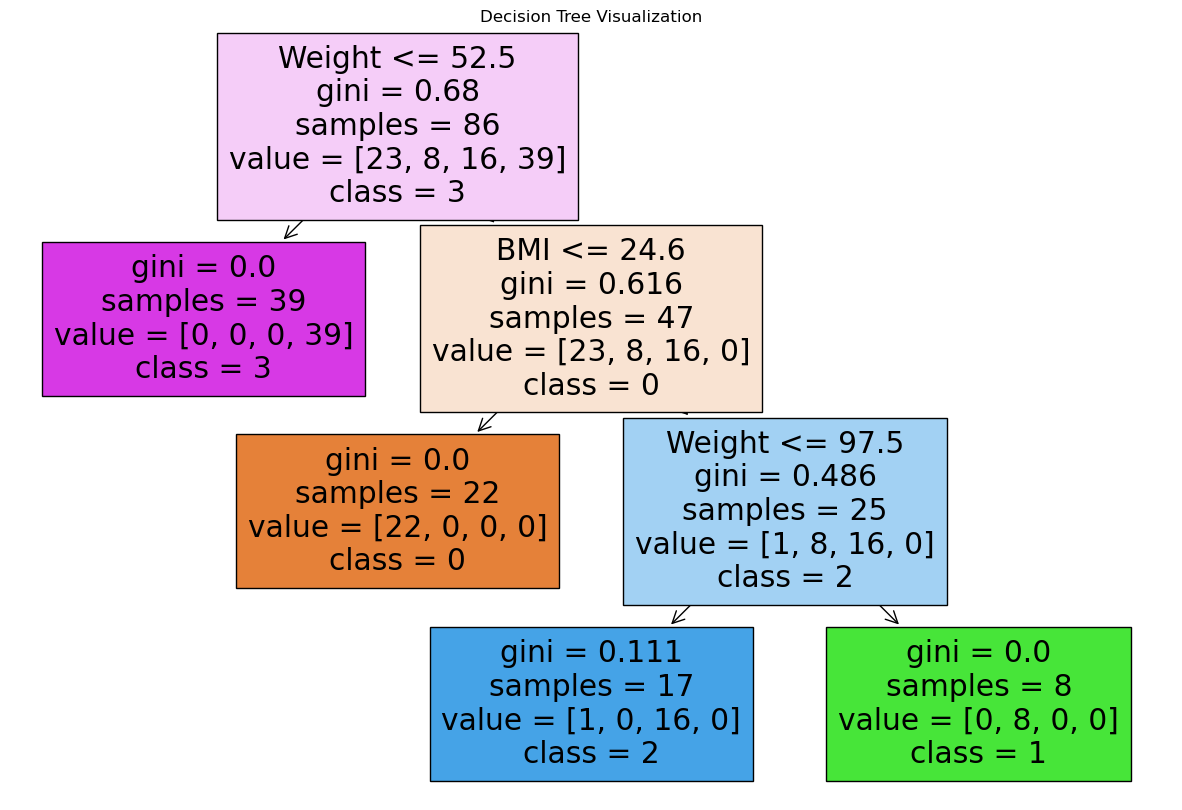

In [167]:
from sklearn.tree import plot_tree

# Convert class labels to list of strings
class_names = [str(label) for label in tree_clf.classes_]

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, feature_names=list(X.columns), class_names=class_names, filled=True)
plt.title('Decision Tree Visualization')
plt.show()


- The decision tree visualization helps interpret the decision rules learned by the model and understand feature importance.
- plot_tree: Ensure that plot_tree receives the correct types for feature_names (list of strings) and class_names (list of strings representing class labels).

## Hyperparameter Tuning with Grid Search

In [168]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Best cross-validation score
print("Best Cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Use the best model found by GridSearchCV
best_tree_clf = grid_search.best_estimator_

# Evaluate the optimized model
y_pred = best_tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Optimized Model: {:.2f}".format(accuracy))


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
Best Cross-validation Accuracy: 0.95
Test Accuracy with Optimized Model: 1.00


- Parameter Grid (param_grid): Define a dictionary where keys are hyperparameters to tune (max_depth, min_samples_leaf, criterion), and values are lists of possible values to try.
- GridSearchCV: Instantiate GridSearchCV with the DecisionTreeClassifier model (tree_clf), param_grid, cross-validation (cv=5), and scoring metric (scoring='accuracy').
- Fit Grid Search: Fit GridSearchCV on the training data (X_train, y_train) to find the best combination of hyperparameters.
- Best Parameters and Score: Print the best parameters found (grid_search.best_params_) and the corresponding cross-validation accuracy (grid_search.best_score_).
- Evaluate Optimized Model: Use the best model found (best_tree_clf) to predict on the test data (X_test) and evaluate its accuracy.

## Cross-Validation Techniques

In [169]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with optimized model
cv_scores = cross_val_score(best_tree_clf, X, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy: {:.2f}".format(cv_scores.mean()))

Cross-validation Scores: [0.86363636 0.95454545 1.         0.9047619  1.        ]
Mean Cross-validation Accuracy: 0.94


- cross_val_score: Use cross_val_score to perform k-fold cross-validation (cv=5 by default) on the optimized model (best_tree_clf) and compute accuracy scores for each fold.

- Cross-validation Scores: Print the cross-validation scores for each fold (cv_scores) and compute the mean accuracy across all folds (cv_scores.mean()).

# Summary

- After preprocessing and encoding the dataset, hyperparameter tuning with grid search optimized the Decision Tree model, improving accuracy. Cross-validation validated the model’s robust performance across different data subsets. Visualization of the Decision Tree revealed clear decision rules, providing insights into obesity classification factors. Overall, the model demonstrated effective classification and valuable interpretability.